Test new TBmodels - kwant interface
===================

In [1]:
import kwant
import tbmodels

from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/home/greschd/.virtualenvs/tbmodels_kwant_test/lib/python3.5/site-packages/kwant/solvers/default.py:18: RuntimeWarning: MUMPS is not available, SciPy built-in solver will be used as a fallback. Performance can be very poor in this case.
  "Performance can be very poor in this case.", RuntimeWarning)


Simple square lattice
---------------------

In [38]:
# Test - do simple square lattice 
model = tbmodels.Model(
    on_site=[1.3],
    dim=2,
    occ=0,
    pos=[[0., 0.]],
    uc = [[1, 0], [0, 1]]
)

t1 = 1.0
#for R in ([1,0],[0,1],[0,2],[0,3],[-2,4]): - throws an error 
for R in ([1,0],[0,1],[0,2],[0,3],[-2,4]):
    model.add_hop(t1, 0, 0, R)

In [39]:
kwant_sys = kwant.Builder()

In [40]:
latt = model.to_kwant_lattice()

In [41]:
def shape(pos):
    x, y = pos
    return -10 < x < 10 and -5 < y < 5

In [42]:
kwant_sys[latt.shape(shape, (0, 0))] = 0

In [43]:
model.add_hoppings_kwant(kwant_sys)

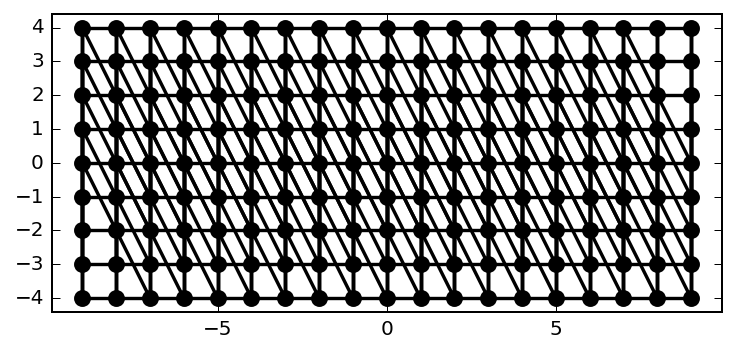

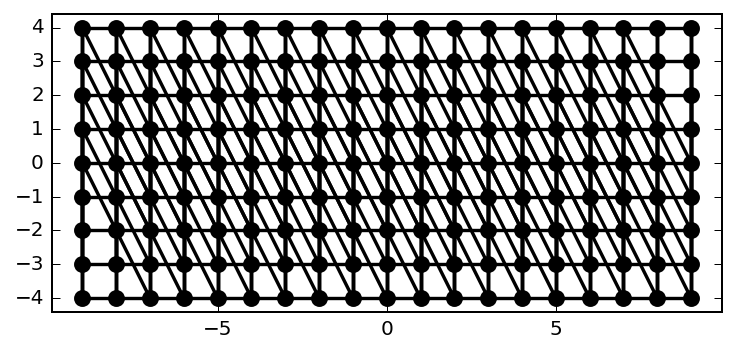

In [44]:
kwant.plot(kwant_sys)

Test with wraparound
-----------------------

In [45]:
import wraparound
import scipy.linalg as la

In [46]:
latt = model.to_kwant_lattice()
sym = kwant.TranslationalSymmetry(
    latt.vec((1, 0)), 
    latt.vec((0, 1))
)

In [47]:
sys = kwant.Builder(sym)
sys[latt.shape(lambda p: True, (0, 0))] = 0

In [59]:
model.add_hoppings_kwant(sys)

In [60]:
sys_wrap = wraparound.wraparound(sys).finalized()

In [112]:
H1 = model.hamilton((0, 0.1))

In [113]:
H2 = sys_wrap.hamiltonian_submatrix((0, 0.2 * np.pi))

In [114]:
H1

array([[ 3.3+0.j]])

In [115]:
H2

array([[ 3.3+0.j]])

Realistic tb model
--------------------

In [18]:
model2 = tbmodels.Model.from_hr_file('wannier90_hr.dat')

In [19]:
sys2 = kwant.Builder()
latt2 = model2.to_kwant_lattice()

In [20]:
def shape2(pos):
    x, y, z = pos
    return -10 < x < 10 and -5 < y < 5 and -5 < z < 5

In [21]:
sys2[latt2.shape(shape2, (0, 0, 0))] = 0

In [22]:
model2.add_hoppings_kwant(sys2)

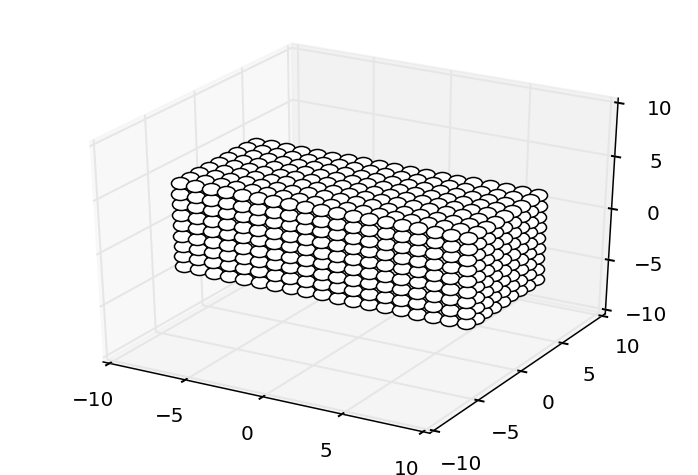

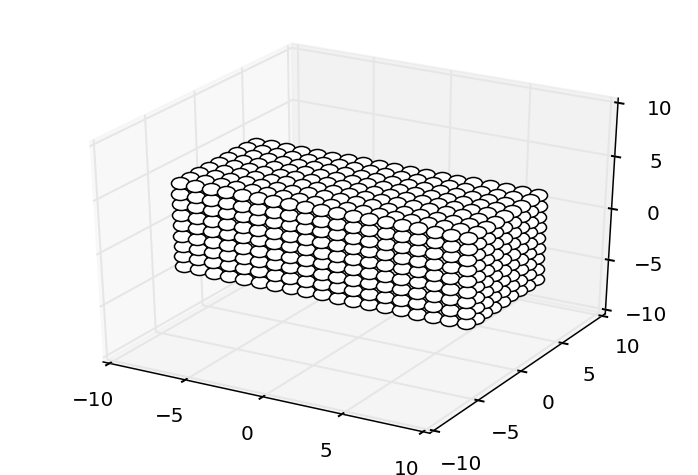

In [23]:
kwant.plot(sys2)

Test with wraparound
-----------------------

In [24]:
latt3 = model2.to_kwant_lattice()
sym3 = kwant.TranslationalSymmetry(
    latt3.vec((1, 0, 0)), 
    latt3.vec((0, 1, 0)),
    latt3.vec((0, 0,1))
)

In [25]:
sys3 = kwant.Builder(sym3)
sys3[latt3.shape(lambda p: True, (0, 0, 0))] = 0

In [26]:
model2.add_hoppings_kwant(sys3)

In [27]:
sys3_wrap = wraparound.wraparound(sys3).finalized()

In [116]:
tbmodels_ham = model2.hamilton((0, 0.1, 0))

In [117]:
kwant_ham = sys3_wrap.hamiltonian_submatrix((0., 0.1 * 2 * np.pi, 0.))

In [118]:
la.eigvalsh(tbmodels_ham)

array([ 2.69445807,  2.69445807,  3.82318697,  3.82318697,  4.06964543,
        4.07746918,  5.63615138,  5.63615138,  8.66744311,  8.66744311,
        9.05325806,  9.05325806,  9.06465144,  9.06659632])

In [119]:
la.eigvalsh(kwant_ham)

array([ 2.69445807,  2.69445807,  3.82318697,  3.82318697,  4.06964543,
        4.07746918,  5.63615138,  5.63615138,  8.66744311,  8.66744311,
        9.05325806,  9.05325806,  9.06465144,  9.06659632])

In [120]:
np.isclose(tbmodels_ham, kwant_ham).all()

True